In [1]:
do = False
if do:
  !chmod +x kagglesetup.sh
  !./kagglesetup.sh d pariza/bbc-news-summary
  !unzip bbc-news-summary.zip

 56% 5.00M/8.91M [00:00<00:00, 24.1MB/s]
100% 8.91M/8.91M [00:00<00:00, 35.3MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: BBC News Summary/Summaries/sport/364.txt  
  inflating: BBC News Summary/Summaries/sport/365.txt  
  inflating: BBC News Summary/Summaries/sport/366.txt  
  inflating: BBC News Summary/Summaries/sport/367.txt  
  inflating: BBC News Summary/Summaries/sport/368.txt  
  inflating: BBC News Summary/Summaries/sport/369.txt  
  inflating: BBC News Summary/Summaries/sport/370.txt  
  inflating: BBC News Summary/Summaries/sport/371.txt  
  inflating: BBC News Summary/Summaries/sport/372.txt  
  inflating: BBC News Summary/Summaries/sport/373.txt  
  inflating: BBC News Summary/Summaries/sport/374.txt  
  inflating: BBC News Summary/Summaries/sport/375.txt  
  inflating: BBC News Summary/Summaries/sport/376.txt  
  inflating: BBC News Summary/Summaries/sport/377.txt  
  inflating: BBC News Summary/Summaries/sport/378.txt  
  inflating: BBC News Summary/Summaries/sport/379.txt  
  inflating: BBC News Summary/Summaries/sport/380.txt

In [173]:
import os
class Utils:
  article_path = '/content/bbc news summary/BBC News Summary/News Articles'
  summary_path = '/content/bbc news summary/BBC News Summary/Summaries'
  def __init__(self):
    pass

  @staticmethod
  def join(path, *paths):
    file_path = os.path.join(path, *paths)
    return file_path

  @staticmethod
  def get_paths(category, filename):
    article_path = Utils.join(Utils.article_path, category, filename)
    summary_path = Utils.join(Utils.summary_path, category, filename)
    return article_path, summary_path
  
  @staticmethod
  def pprint(article, summary):
    print("\n")
    print("--------------------- ARTICLE ---------------------")
    print(article)
    print("\n")
    print("--------------------- SUMMARY ----------------------")
    print(summary)


article_path = Utils.article_path
summary_path = Utils.summary_path
print(article_path)

/content/bbc news summary/BBC News Summary/News Articles


In [174]:
import os
import tensorflow as tf
categories = os.listdir(article_path)
docs = []
summaries = []
cat = []
for category in categories:
  file_path = Utils.join(article_path, category)
  file_list = os.listdir(file_path)
  for file_name in file_list:
      article_p, summary_p = Utils.get_paths(category, file_name)
      with open(article_p, 'rb') as f:
        docs.append(f.read().decode("ISO-8859-1"))
      with open(summary_p, 'rb') as f:
        summaries.append(f.read().decode("ISO-8859-1"))

In [175]:
x = Utils.join(article_path, 'business')
y = Utils.join(summary_path, 'business')
article = open(Utils.join(x, os.listdir(x)[0]))
summary = open(Utils.join(y, os.listdir(y)[0]))
print("---------- ARTICLE ------------")
print(article.read())
print("---------- SUMMARY ------------")
print(summary.read())


---------- ARTICLE ------------
Small firms 'hit by rising costs'

Rising fuel and materials costs are hitting confidence among the UK's small manufacturers despite a rise in output, business lobby group the CBI says.

A CBI quarterly survey found output had risen by the fastest rate in seven years but many firms were seeing the benefits offset by increasing expenses. The CBI also found spending on innovation, training and retraining is forecast to go up over the next year. However, firms continue to scale back investment in buildings and machinery.

The CBI said companies are looking to the government to lessen the regulatory load and are hoping interest rates will be kept on hold. "Smaller manufacturers are facing an uphill struggle," said Hugh Morgan Williams, chair of the CBI's SME Council. "The manufacturing sector needs a period of long-term stability in the economy." The CBI found some firms managed to increase prices for the first time in nine years - but many said increases fa

In [176]:
import pandas as pd
df_train = pd.DataFrame({'articles':docs, 'summaries':summaries})
df_train = df_train.sample(frac=1).reset_index(drop=True)


In [177]:
df_train

,articles,summaries
0,US to probe airline travel chaos\n\nThe US gov...,"Ground crews at US Airways, the seventh-larges..."
1,Wall Street cheers Bush victory\n\nThe US stoc...,Senator Kerry attacked President Bush's econom...
2,Umbro profits lifted by Euro 2004\n\nUK sports...,UK sportswear firm Umbro has posted a 222% ris...
3,O'Leary agrees new Villa contract\n\nAston Vil...,"""It was important to me Roy and Steve, an inte..."
4,"Creator of first Apple Mac dies\n\nJef Raskin,...",Mr Raskin was one of the first employees at Ap...
...,...,...
2220,US composer recreates Bach score\n\nA US music...,A US musicologist has recreated a lost musical...
2221,Markets signal Brazilian recovery\n\nThe Brazi...,Investors have praised his handling of the eco...
2222,Oil rebounds from weather effect\n\nOil prices...,With winter temperatures staying relatively hi...
2223,US to rule on Yukos refuge call\n\nYukos has s...,Yukos has said a US bankruptcy court will deci...


In [178]:
import re
text = df_train.loc[0, 'articles']
new_text = re.sub(pattern = '[\n]+', repl = ' ', string = text)
print("Text without replacement: ", text)
print("Text with replacement:\n", new_text)

Text without replacement:  US to probe airline travel chaos

The US government is to investigate two airlines- US Airways and Delta Air Lines' Comair subsidiary - after travel chaos over the Christmas weekend.

Staff calling in sick at US Airways and computer failures at Comair left 30,000 passengers stranded and 10,000 pieces of baggage undelivered. US Airways is in Chapter 11 bankruptcy protection for the second time in two years, and battling to cut costs. It is currently trying to negotiate pay cuts with flight and baggage staff.

Transportation Secretary Norman Mineta said he was "deeply concerned" at the disruption to passengers, and ordered a thorough investigation. Comair's computer breakdown plunged its flight-crew scheduling system into disarray. Altogether, some 1,100 flights were cancelled over the holiday long weekend. Mr Mineta said it was important to understand "what happened, why it happened and whether the carriers properly planned for the holiday travel period and re

In [179]:
df_train['articles'] = df_train['articles'].apply(lambda x: re.sub('[\n]+', ' ', x))

In [180]:
articles, summaries = df_train.head(5).iloc[:, 0],  df_train.head(5).iloc[:, 1]
for article, summary in zip(articles, summaries):
  Utils.pprint(article, summary)



--------------------- ARTICLE ---------------------
US to probe airline travel chaos The US government is to investigate two airlines- US Airways and Delta Air Lines' Comair subsidiary - after travel chaos over the Christmas weekend. Staff calling in sick at US Airways and computer failures at Comair left 30,000 passengers stranded and 10,000 pieces of baggage undelivered. US Airways is in Chapter 11 bankruptcy protection for the second time in two years, and battling to cut costs. It is currently trying to negotiate pay cuts with flight and baggage staff. Transportation Secretary Norman Mineta said he was "deeply concerned" at the disruption to passengers, and ordered a thorough investigation. Comair's computer breakdown plunged its flight-crew scheduling system into disarray. Altogether, some 1,100 flights were cancelled over the holiday long weekend. Mr Mineta said it was important to understand "what happened, why it happened and whether the carriers properly planned for the holi

In [181]:
import nltk
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop = set(stopwords.words('english'))
word_count = defaultdict(int)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [182]:
from bs4 import BeautifulSoup
html = '''
<td><a href="http://www.irit.fr/SC">Signal et Communication</a>
<br/><a href="http://www.irit.fr/IRT">Ingénierie Réseaux et Télécommunications</a>
</td>
'''
soup = BeautifulSoup(html)
text = soup.get_text()
print(text)

Signal et Communication
Ingénierie Réseaux et Télécommunications




In [183]:
st = "Go\'s to hell\'s"
st = re.sub(r"'s\b","",st)
print(st)

Go to hell


In [184]:
from tqdm import tqdm
import string
class TextProcessor:
  processed_texts = {}
  contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

  append_intermediate = True
  def __init__(self):
    self.RECORD = True
  

  def set_recording(self, mode):
    if mode == "STOP":
      self.RECORD = False
    elif mode == "START":
      self.RECORD = True 


  def tokenizer(self, texts):
    tokenized_texts = []
    for text in tqdm(texts):
      text_tok = [word_tokenize(x) for x in sent_tokenize(text)]
      text_tok = [word for sents in text_tok for word in sents]
      tokenized_texts.append(text_tok)
    return tokenized_texts

  def get_stopwords(self, texts):
    word_count = defaultdict(int)
    tokenized_texts = self.tokenizer(texts)
    if self.RECORD:
      self.processed_texts['tokenizer'] = tokenized_texts
    for text in tqdm(tokenized_texts):
      for word in text:
        if word in stop:
          word_count[word] += 1
    return word_count

  def remove_contraction_mapping(self, text):
    s_text = ' '.join([self.contraction_mapping[t] if t in self.contraction_mapping else t for t in text.split(" ")])
    return s_text

  def remove_html_tags(self, text):
    soup = BeautifulSoup(text)
    soup = soup.get_text()
    return soup
  
  def remove_punct(self, text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, ' ', text)
    return text

  def remove_urls(self, x):
    pattern1 = r'http?://\S+|www\.\S+'
    pattern2 = r'https?://\S+|www\.\S+'
    res = re.sub(pattern1, ' ', x, re.IGNORECASE)
    res = re.sub(pattern2, ' ', x, re.IGNORECASE)
    return res

  def remove_s(self, text):
    text = re.sub(r"'s\b","",text)
    return text
  
  def remove_stopwords(self, text):
    text_without_stopword = [word.lower() for word in text.split() if word.lower() not in stop]
    text_without_stopword = " ".join(text_without_stopword)
    return text_without_stopword
  
  def remove_accented_chars(self,text):
    text = unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8', 'ignore')
    return text
  
  def check_urls(self,texts):
    linked_texts = []
    pattern1 = 'http://\S+|www\.\S+'
    pattern2 = 'https://\S+|www\.\S+'
    for x in texts:
      if re.search(pattern1, x, re.IGNORECASE)!=None or  re.search(pattern2, x, re.IGNORECASE) != None:
        linked_texts.append(x)
    return linked_texts
  
  def get_special_chars(self, texts):
    special_chars = string.punctuation
    dic = defaultdict(int)
    for j in texts:
      for i in j:
        if i in special_chars:
          dic[i] += 1
    return dic

  def pipeline(self, text, *funcs):
    self.processed_texts = {}
    for func in funcs:
      text = func(text)
      if self.RECORD:
        self.processed_texts[func.__name__] = text
      else:
        self.processed_texts['output'] = text
    return self.processed_texts

textProcessor = TextProcessor()
pl = textProcessor.pipeline

In [185]:
import nltk
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop = set(stopwords.words('english'))

texts = df_train['articles']
processed_texts = textProcessor.pipeline(texts, textProcessor.get_stopwords)

  1%|▏         | 28/2225 [00:00<00:08, 274.61it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 2225/2225 [00:00<00:00, 15828.39it/s]


In [186]:
df_train['articles_ws'] = df_train['articles'].map(lambda text: pl(text, textProcessor.remove_stopwords)['remove_stopwords'])

In [187]:
textProcessor.processed_texts

{'remove_stopwords': "parmalat boasts doubled profits parmalat, italian food group centre one europe's painful corporate scandals, reported doubling profit. pre-tax earnings fourth quarter 77m euros (â£53m; $100m), 38m period 2003. less welcome news firm fined 11m euros violated takeover rules five years ago. firm sought bankruptcy protection december 2003 disclosing 4bn-euro hole accounts. overall, company's debt close 12bn euros, falling slowly. brands, well-known italy overseas, continued perform strongly, however, barely lost revenue since scandal broke. crucial factor company's future legal unwinding intensely complex financial position. tuesday, company's administrator, turnaround expert enrico bondi, sued morgan stanley, former banker, return 136m euros relating 2003 bond deal. brought 49 number banks mr bondi sued, mass legal action could bring much 3bn euros. company also sued former auditors financial advisors damages. criminal cases company's former management proceeding sep

In [188]:
df_train[['articles','articles_ws']]

,articles,articles_ws
0,US to probe airline travel chaos The US govern...,us probe airline travel chaos us government in...
1,Wall Street cheers Bush victory The US stock m...,wall street cheers bush victory us stock marke...
2,Umbro profits lifted by Euro 2004 UK sportswea...,umbro profits lifted euro 2004 uk sportswear f...
3,O'Leary agrees new Villa contract Aston Villa ...,o'leary agrees new villa contract aston villa ...
4,"Creator of first Apple Mac dies Jef Raskin, he...","creator first apple mac dies jef raskin, head ..."
...,...,...
2220,US composer recreates Bach score A US musicolo...,us composer recreates bach score us musicologi...
2221,Markets signal Brazilian recovery The Brazilia...,markets signal brazilian recovery brazilian st...
2222,Oil rebounds from weather effect Oil prices re...,oil rebounds weather effect oil prices recover...
2223,US to rule on Yukos refuge call Yukos has said...,us rule yukos refuge call yukos said us bankru...


In [189]:
stopw_count = processed_texts['get_stopwords']

In [190]:
import plotly.graph_objs as go
top=sorted(stopw_count.items(), key=lambda x:x[1],reverse=True)[:20]
x, y = zip(*top)
data = go.Bar(x = x,
              y = y,
              marker = dict(color = 'rgb(255, 255, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig = go.Figure(data = data)
fig.show()

In [191]:
texts = df_train['articles_ws']
p_texts = textProcessor.pipeline(texts, textProcessor.get_stopwords)

100%|██████████| 2225/2225 [00:00<00:00, 38388.68it/s]


In [192]:
stopw_ = p_texts['get_stopwords']

In [193]:
import plotly.graph_objs as go
top=sorted(stopw_.items(), key=lambda x:x[1],reverse=True)[:20]
x, y = zip(*top)
data = go.Bar(x = x,
              y = y,
              marker = dict(color = 'rgb(255, 255, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig = go.Figure(data = data)
fig.show()

In [194]:
special_char_count = pl(df_train['articles_ws'], textProcessor.get_special_chars)

In [195]:
from collections import Counter
lengths = Counter([len(x) for x in p_texts['tokenizer']])
x, y = zip(*lengths.items())
data = go.Box(x = x,
              marker = dict(color = 'rgb(255, 255, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig = go.Figure(data = data)
fig.show()

In [196]:
import plotly.graph_objs as go
top=sorted(special_char_count['get_special_chars'].items(), key=lambda x:x[1],reverse=True)[:20]
x, y = zip(*top)
data = go.Bar(x = x,
              y = y,
              marker = dict(color = 'rgb(255, 0, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig = go.Figure(data = data)
fig.show()

In [197]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [198]:
import numpy as np
link_counts = pl(np.array(df_train['articles']), textProcessor.check_urls)

In [199]:
textProcessor.set_recording("STOP")

article_pp = [textProcessor.remove_stopwords, textProcessor.remove_contraction_mapping, textProcessor.remove_html_tags,
              textProcessor.remove_accented_chars,textProcessor.remove_s, textProcessor.remove_punct, textProcessor.remove_urls]
article_pp = [textProcessor.remove_stopwords, textProcessor.remove_contraction_mapping, textProcessor.remove_html_tags,
              textProcessor.remove_accented_chars, textProcessor.remove_s, textProcessor.remove_urls]
df_train['articles_processed'] = df_train['articles'].map(lambda text: pl(text, *article_pp)['output'])

In [200]:
df_train['summaries_processed'] = df_train['summaries'].map(lambda text: pl(text, *article_pp)['output'])

In [201]:
df_train['articles_processed'][0]

'us probe airline travel chaos us government investigate two airlines- us airways delta air lines\' comair subsidiary - travel chaos christmas weekend. staff calling sick us airways computer failures comair left 30,000 passengers stranded 10,000 pieces baggage undelivered. us airways chapter 11 bankruptcy protection second time two years, battling cut costs. currently trying negotiate pay cuts flight baggage staff. transportation secretary norman mineta said "deeply concerned" disruption passengers, ordered thorough investigation. comair computer breakdown plunged flight-crew scheduling system disarray. altogether, 1,100 flights cancelled holiday long weekend. mr mineta said important understand "what happened, happened whether carriers properly planned holiday travel period responded appropriately consumer needs aftermath". adding atmosphere chaos mountains luggage left pile third us airways\' baggage handling staff called sick. also shortage us airways flight attendants, nearly fifth

In [202]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))]


In [203]:
df_train['tokenized_summaries'] = df_train['summaries_processed'].map(lambda text: 'sostok ' + text + ' eostok')
articles, summaries = df_train.head().loc[:,'articles_processed'], df_train.head().loc[:,'tokenized_summaries']
for article, summary in zip(articles, summaries):
  Utils.pprint(article, summary)



--------------------- ARTICLE ---------------------
us probe airline travel chaos us government investigate two airlines- us airways delta air lines' comair subsidiary - travel chaos christmas weekend. staff calling sick us airways computer failures comair left 30,000 passengers stranded 10,000 pieces baggage undelivered. us airways chapter 11 bankruptcy protection second time two years, battling cut costs. currently trying negotiate pay cuts flight baggage staff. transportation secretary norman mineta said "deeply concerned" disruption passengers, ordered thorough investigation. comair computer breakdown plunged flight-crew scheduling system disarray. altogether, 1,100 flights cancelled holiday long weekend. mr mineta said important understand "what happened, happened whether carriers properly planned holiday travel period responded appropriately consumer needs aftermath". adding atmosphere chaos mountains luggage left pile third us airways' baggage handling staff called sick. also 

In [204]:
i = 0
for summary in df_train['tokenized_summaries']:
  x = summary.split()
  i += 1
  print(i)
  if x[0] != 'sostok' or x[len(x) - 1] != 'eostok':
    print("[ERROR]: ",x)
print(df_train.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [205]:
article_word_count = df_train['articles_processed'].map(lambda x: len(x.split()))
summary_word_count = df_train['tokenized_summaries'].map(lambda x: len(x.split()))

In [206]:
import plotly.express as px
df_count = pd.DataFrame({'ArticleCount':article_word_count, 'SummaryCount':summary_word_count})
fig = px.histogram(df_count, x='ArticleCount')
fig.show()
fig = px.histogram(df_count, x='SummaryCount')
fig.show()

In [207]:
from sklearn.model_selection import train_test_split
max_article_len = 200
max_summary_len = 80
x_train, x_val, y_train, y_val = train_test_split(df_train['articles_processed'], df_train['tokenized_summaries'], test_size = 0.2, )

In [208]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

def return_tokens(train, test, type = 'article'):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train)
    train_token = tokenizer.texts_to_sequences(train)
    test_token = tokenizer.texts_to_sequences(test)
    if type == 'article':
      maxlen = max_article_len
    else:
      maxlen = max_summary_len
    train_token = pad_sequences(train_token, maxlen = maxlen)
    test_token = pad_sequences(test_token, maxlen = maxlen)
    vocab_size = len(tokenizer.word_index) + 1

    return tokenizer, train_token, test_token, vocab_size

x_tokenizer, x_train_token, x_test_token, x_vocab_size = return_tokens(x_train, x_val)
y_tokenizer, y_train_token, y_test_token, y_vocab_size = return_tokens(y_train, y_val, type='summary')


In [209]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
y_tokenizer.word_index

In [223]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Bidirectional
K.clear_session()
latent_dim = 128
embedding_dim = 128
no_of_layers = 3
lstm_units = 32
import numpy as np
# x_train_token = np.expand_dims(x_train_token, 2)
# x_test_token = np.expand_dims(x_test_token, 2)
encoder_inputs = Input(shape = (max_article_len,))
encoder_emb = Embedding(x_vocab_size, latent_dim)(encoder_inputs)
params = {'units':lstm_units, 'return_sequences':True, 'return_state':True}
encoder_lstm1 = Bidirectional(LSTM(lstm_units, return_sequences=True, return_state=True))
# encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_emb)
# encoder_lstm2 = LSTM(lstm_units, return_sequences=True, return_state=True)
encoder_outputs, forward_state_h, backward_state_h, forward_state_c, backward_state_c = encoder_lstm1(encoder_emb)
state_h = Concatenate()([forward_state_h, backward_state_h])
state_c = Concatenate()([forward_state_c, backward_state_c])
decoder_inputs = Input(shape = (None,))
dec_emb_layer = Embedding(y_vocab_size, embedding_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 
decoder_lstm = LSTM(lstm_units*2, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
decoder_dense = TimeDistributed(Dense(y_vocab_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 128)     3569920     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 200, 64), (N 41216       embedding[0][0]                  
______________________________________________________________________________________________

In [240]:
y_train_token

array([[    7,   155,  3435, ..., 11460,   354,     4],
       [    0,     0,     0, ...,    17,    41,     4],
       [    0,     0,     0, ...,   893,   463,     4],
       ...,
       [    0,     0,     0, ...,  1287,   127,     4],
       [ 1199,  1600, 11033, ...,  2379, 18827,     4],
       [    0,     0,     0, ..., 18829, 11453,     4]], dtype=int32)

In [224]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history=model.fit([x_train_token,
                   y_train_token[:,:-1]], 
                  y_train_token.reshape(y_train_token.shape[0],y_train_token.shape[1], 1)[:,1:] ,
                  epochs=50,callbacks=[es],batch_size=128, 
                  validation_data=([x_test_token,y_test_token[:,:-1]], 
                                   y_test_token.reshape(y_test_token.shape[0],
                                                        y_test_token.shape[1], 1)[:,1:]))


Epoch 1/50
14/14 [==============================] - 7s 480ms/step - loss: 9.8267 - val_loss: 9.7657
Epoch 2/50
14/14 [==============================] - 5s 390ms/step - loss: 9.3772 - val_loss: 8.6235
Epoch 3/50
14/14 [==============================] - 5s 391ms/step - loss: 8.3578 - val_loss: 7.9906
Epoch 4/50
14/14 [==============================] - 5s 383ms/step - loss: 8.0544 - val_loss: 7.8221
Epoch 5/50
14/14 [==============================] - 5s 385ms/step - loss: 7.9761 - val_loss: 7.8023
Epoch 6/50
14/14 [==============================] - 6s 396ms/step - loss: 7.9535 - val_loss: 7.7895
Epoch 7/50
14/14 [==============================] - 5s 393ms/step - loss: 7.9334 - val_loss: 7.7653
Epoch 8/50
14/14 [==============================] - 5s 387ms/step - loss: 7.9060 - val_loss: 7.7334
Epoch 9/50
14/14 [==============================] - 5s 390ms/step - loss: 7.8692 - val_loss: 7.6921
Epoch 10/50
14/14 [==============================] - 5s 387ms/step - loss: 7.8270 - val_loss: 7.6480

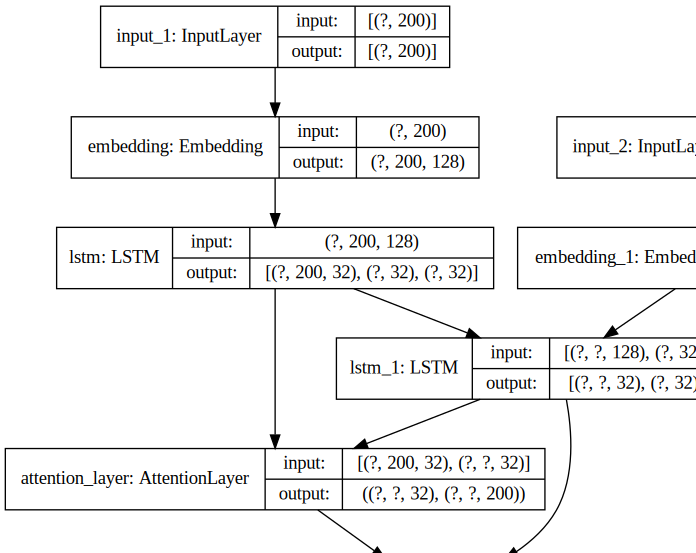

In [213]:

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="network.png")
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

In [225]:
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])
decoder_state_input_h = Input(shape = (lstm_units*2,))
decoder_state_input_c = Input(shape = (lstm_units*2,))
decoder_hidden_state_input = Input(shape=(max_article_len,lstm_units*2))
dec_emb2= dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])
decoder_outputs2 = decoder_dense(decoder_inf_concat)
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])


In [232]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    # print("L1")
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # print("L2")
    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['sostok']
    # print("L3")
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        print(output_tokens[0,-1,:])
        # print("L4")
        # Sample a token

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        # print("L5")
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token
            # print("L6")
            # print("Sampled Token: ", sampled_token)
            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_summary_len-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [238]:
arr = np.array([[[1,2,3,4,5,6],[1,2,3,4,5,6], [1,2,3,4,5,6]]])
arr[0,-1,:]

array([1, 2, 3, 4, 5, 6])

In [227]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [218]:
vals = list(zip(reverse_target_word_index.keys(), reverse_target_word_index.values()))
vals[len(vals) - 1]

(18829, 'eckhard')

In [231]:
for i in range(3):
  print("Review:",seq2text(x_test_token[i]))
  print("Original summary:",seq2summary(y_test_token[i]))
  print("Predicted summary:",decode_sequence(x_test_token[i].reshape(1,max_article_len)))
  print("\n")

Review: walls dry lined single skin laid allow good wall insulation power lighting circuits walls painted light colour owner mentions might lay new floor existing planks improve insulation offer level surface would suggest laying new oak planks work character lighting consider combination floor mounted wall lights wall selected use combination mains voltage units vary light levels feel interior please click link right see ideas layout office reflects need working area relaxed meeting space large desk space extensive storage would combine chairs maximise space available chosen furniture need reflect unusual setting lighting temperature control mechanisms used influence workplace regarding accessing internet via connection main house plan going wireless sensible wireless router access point house wireless lan card pc area may sufficient however important points consider distance two buildings nature materials signals pass could result weak signal strength may require additional wireless 

KeyError: ignored

In [ ]:
reverse_target_word_index

In [ ]:
x_test_token